In [1]:
import pandas as pd
import numpy as np
import random as rnd
import re
import pickle

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import precision_score, balanced_accuracy_score

In [17]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM

from sklearn.metrics import silhouette_score

In [11]:
SEED = 1

In [4]:
features = 'REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT, SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN'
col_names = features.split(',') + ['Class']
# print(col_names)

In [5]:
dataset_dir = '../Datasets/statlog_image_segmentation'
df = pd.read_csv(dataset_dir + '/segment.dat', names=col_names, sep=' ')
df.shape

(2310, 20)

In [6]:
df.head(2)

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,Class
0,218.0,178.0,9,0.111111,0.0,0.833333,0.547722,1.111109,0.544331,59.629630,52.444443,75.222220,51.222220,-21.555555,46.77778,-25.222221,75.222220,0.318996,-2.040554,6
1,113.0,130.0,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.000000,2.555556,0.111111,-2.666667,5.00000,-2.333333,2.555556,1.000000,-2.123254,3


In [7]:
df.describe()

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN,Class
count,2310.000000,2310.000000,2310.0,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2.310000e+03,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000,2310.000000
mean,124.913853,123.417316,9.0,0.014334,0.004714,1.893939,5.709320,2.424723,8.243692e+00,37.051595,32.821308,44.187879,34.145599,-12.690861,21.408850,-8.717989,45.137470,0.426893,-1.362897,4.000000
std,72.956532,57.483851,0.0,0.040154,0.024234,2.698908,44.846457,3.610084,5.881152e+01,38.176410,35.036774,43.527461,36.364773,11.583562,19.571819,11.551628,42.921764,0.228309,1.545335,2.000433
min,1.000000,11.000000,9.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.589457e-08,0.000000,0.000000,0.000000,0.000000,-49.666668,-12.444445,-33.888890,0.000000,0.000000,-3.044175,1.000000
25%,62.000000,81.000000,9.0,0.000000,0.000000,0.722222,0.355555,0.777780,4.216373e-01,7.296296,7.000000,9.555555,6.027778,-18.555555,4.138889,-16.777779,11.555555,0.284235,-2.188057,2.000000
50%,121.000000,122.000000,9.0,0.000000,0.000000,1.222224,0.833333,1.444444,9.629633e-01,21.592592,19.555555,27.666667,20.333334,-10.888889,19.666666,-10.888889,28.666666,0.374803,-2.051200,4.000000
75%,189.000000,172.000000,9.0,0.000000,0.000000,2.166667,1.806367,2.555556,2.183269e+00,53.212964,47.333332,64.888890,46.500001,-4.222222,35.777780,-3.222222,64.888890,0.540123,-1.562308,6.000000
max,254.000000,251.000000,9.0,0.333333,0.222222,29.222221,991.718400,44.722225,1.386329e+03,143.444440,137.111110,150.888890,142.555560,9.888889,82.000000,24.666666,150.888890,1.000000,2.912480,7.000000


In [8]:
df['Class'].unique()

array([6, 3, 2, 7, 1, 4, 5])

In [9]:
column_names = df.columns
y = df['Class'].copy().values
X = df.drop(['Class'], axis=1).values
# to 0 - N-1
y = y-1

In [12]:
# Normalize feature data
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Titanic

In [ ]:
dataset_dir = './titanic'
dataset = pd.read_csv(dataset_dir + '/train.csv')
dataset.head()

In [ ]:
dataset.describe()

In [ ]:
dataset.describe(include='O')

In [ ]:
# Drop 'PassengerId', 'Name' and Ticket' -- don't seem to be particular interesting, 
# Drop 'Cabin' -- too few data, 
dataset = dataset.drop(['PassengerId', 'Name','Ticket', 'Cabin'], axis=1)

In [ ]:
grid = sns.FacetGrid(dataset, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [ ]:
# Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) 
# to calculate guessed values of Age for the six combinations.
guess_ages = np.zeros((2,3))

for i,sex in enumerate(['male','female']):
    for j in range (0, 3):
        guess_df = dataset[(dataset['Sex'] == sex) & \
                           (dataset['Pclass'] == j+1)]['Age'].dropna()

        age_guess = guess_df.median()
        guess_ages[i, j] = int(age_guess)

for i,sex in enumerate(['male','female']):
    for j in range(0, 3):
        dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == sex) & 
                    (dataset.Pclass == j+1), 'Age'] = guess_ages[i, j]

dataset["Age"].isnull().sum()

In [ ]:
# Series.mode Return the highest frequency value in a Series.
common_port = dataset.Embarked.dropna().mode()[0]
dataset['Embarked'] = dataset['Embarked'].fillna(common_port)
print(common_port)

In [ ]:
# Convert sex from text to numerical
dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [ ]:
dataset.loc[ dataset['Age'] <= 12, 'Age'] = 0
dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 24), 'Age'] = 1
dataset.loc[(dataset['Age'] > 24) & (dataset['Age'] <= 48), 'Age'] = 2
dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
dataset.loc[ dataset['Age'] > 64, 'Age'] = 4

In [ ]:
dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
dataset['Fare'] = dataset['Fare'].astype(int)

In [ ]:
dataset[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

column_names = dataset.columns
y = dataset['Survived'].copy().values
X = dataset.drop(['Survived'], axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# K-Means

In [13]:
# SEEDS = np.random.randint(0,100, size=5)
SEEDS = [0, 2,  5, 46, 57, 88]
print(SEEDS)

[0, 2, 5, 46, 57, 88]


In [19]:
km_sse = []
km_sil = []

k_max = 10
for k in range(2, k_max+1):
    inertias = []
    sil = []
    db = []

    for seed in SEEDS:
        ## K-Means
        km = KMeans(n_clusters=k, random_state=seed)
        km = km.fit(X_train_scaled)
        labels = km.predict(X_train_scaled)
        
        inertias.append(km.inertia_)
        silhouette = silhouette_score(X_train_scaled, labels, metric='euclidean')
        sil.append(silhouette)   
    
    ## average
    km_sse.append(np.mean(inertias))
    km_sil.append(np.mean(sil))


In [19]:
gmm_score = []
gmm_bic = []

k_max = 10
for k in range(2, k_max+1):  
    gs = []
    bic = []
    for seed in SEEDS:
        ## EM GaussianMixture
        gmm = GMM(n_components=k, random_state=seed, n_init=10, max_iter=1000)
        gmm = gmm.fit(X_train_scaled)
        
        gs.append(gmm.score(X_train_scaled))
        bic.append(gmm.bic(X_train_scaled))        
    
    ## average
    gmm_score.append(np.mean(gs))
    gmm_bic.append(np.mean(bic))

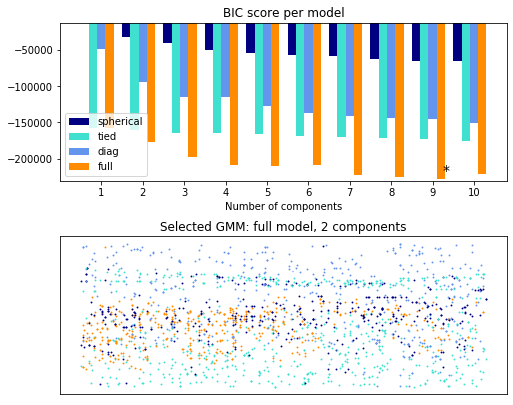

In [51]:
import numpy as np
import itertools

from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

# Number of samples per component
n_samples = 500

# Generate random sample, two components
np.random.seed(0)
# C = np.array([[0., -0.1], [1.7, .4]])
# X = np.r_[np.dot(np.random.randn(n_samples, 2), C),
#           .7 * np.random.randn(n_samples, 2) + np.array([-6, 3])]


lowest_bic = np.infty
bic = []
n_components_range = range(1, 11)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a Gaussian mixture with EM
        gmm = GMM(n_components=n_components,
                                      covariance_type=cv_type)
        gmm.fit(X_train_scaled)
        bic.append(gmm.bic(X_train_scaled))
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

bic = np.array(bic)
color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])
clf = best_gmm
bars = []

# Plot the BIC scores
plt.figure(figsize=(8, 6))
spl = plt.subplot(2, 1, 1)
for i, (cv_type, color) in enumerate(zip(cv_types, color_iter)):
    xpos = np.array(n_components_range) + .2 * (i - 2)
    bars.append(plt.bar(xpos, bic[i * len(n_components_range):
                                  (i + 1) * len(n_components_range)],
                        width=.2, color=color))
plt.xticks(n_components_range)
plt.ylim([bic.min() * 1.01 - .01 * bic.max(), bic.max()])
plt.title('BIC score per model')
xpos = np.mod(bic.argmin(), len(n_components_range)) + .65 +\
    .2 * np.floor(bic.argmin() / len(n_components_range))
plt.text(xpos, bic.min() * 0.97 + .03 * bic.max(), '*', fontsize=14)
spl.set_xlabel('Number of components')
spl.legend([b[0] for b in bars], cv_types)

# Plot the winner
splot = plt.subplot(2, 1, 2)
Y_ = clf.predict(X_train_scaled)
for i, (mean, cov, color) in enumerate(zip(clf.means_, clf.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(Y_ == i):
        continue
    plt.scatter(X_train_scaled[Y_ == i, 0], X_train_scaled[Y_ == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model, 2 components')
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

In [54]:
len(clf.means_)

9

In [50]:
best_gmm

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=9, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

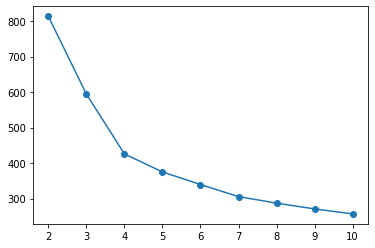

In [20]:
x = list(range(2,k_max+1))
plt.plot(x, km_sse,'o-')

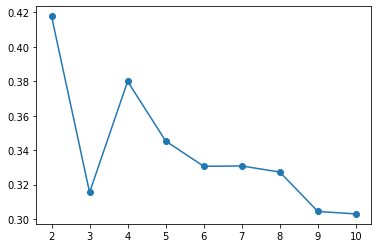

In [21]:
plt.plot(x, km_sil, 'o-')

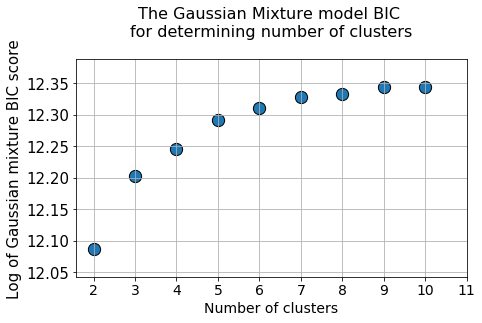

In [36]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,11)],y=[np.log(-x) for x in gmm_bic],s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

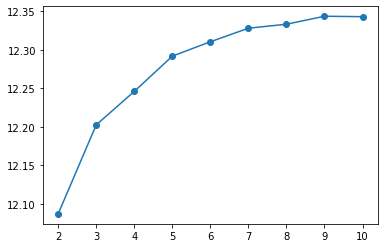

In [34]:
plt.plot(x, [np.log(-x) for x in gmm_bic], 'o-')

In [44]:
[(x[0], abs(x[1])) for x in zip(gm_bic, gmm_bic)]

[(177505.57943638397, 177505.57943640347),
 (207800.61128318627, 199281.65751093192),
 (208075.66093255524, 208139.47144525938),
 (222755.25788145026, 217900.67374122082),
 (223264.34396173098, 222014.31803869223),
 (228611.76833059476, 225965.50976010427),
 (227213.077857716, 227134.68312683314),
 (230941.53570822751, 229505.92230669153),
 (226956.41454585793, 229376.26466122185)]

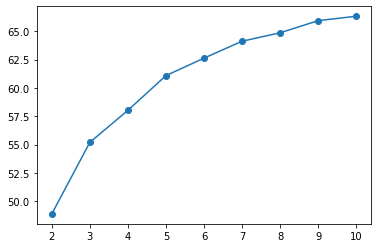

In [23]:
plt.plot(x, gmm_score, 'o-')

In [114]:
sse,iner = calculate_WSS(X_train_scaled, 15)

In [115]:
sse[0], iner[0]

(1437.041122785567, 1437.0411227855932)

In [88]:
Error = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k).fit(X_train_scaled)
    kmeans.fit(X_train_scaled)
    Error.append(kmeans.inertia_)


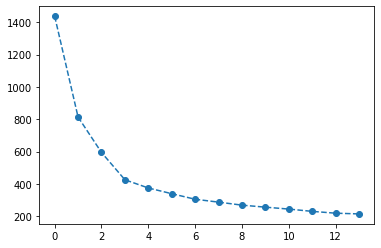

In [89]:
plt.plot(Error, 'o--')

In [70]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X_train_scaled)
    labels = kmeans.labels_
    sil.append(silhouette_score(X_train_scaled, labels, metric = 'euclidean'))

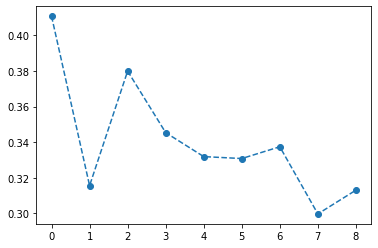

In [71]:
plt.plot(sil, 'o--')

In [67]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [73]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
X_scaled = X_train_scaled

for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
#     v_measure = v_measure_score(y_train,preds)
#     vmeasure_score.append(v_measure)
#     print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
#     print("-"*100)

Score for number of cluster(s) 2: -814.8531587558467
Silhouette score for number of cluster(s) 2: 0.4537922528740315
Davies Bouldin score for number of cluster(s) 2: 0.7977661760054997
Score for number of cluster(s) 3: -594.6796308649199
Silhouette score for number of cluster(s) 3: 0.31553457799064183
Davies Bouldin score for number of cluster(s) 3: 1.2070812465017908
Score for number of cluster(s) 4: -425.86547734119654
Silhouette score for number of cluster(s) 4: 0.3799244128195789
Davies Bouldin score for number of cluster(s) 4: 1.0299582813907602
Score for number of cluster(s) 5: -374.9819913820084
Silhouette score for number of cluster(s) 5: 0.3453592110241834
Davies Bouldin score for number of cluster(s) 5: 1.1520036141779533
Score for number of cluster(s) 6: -339.4464562328417
Silhouette score for number of cluster(s) 6: 0.33187862706172055
Davies Bouldin score for number of cluster(s) 6: 1.1365337144553431
Score for number of cluster(s) 7: -305.37941264293124
Silhouette score f

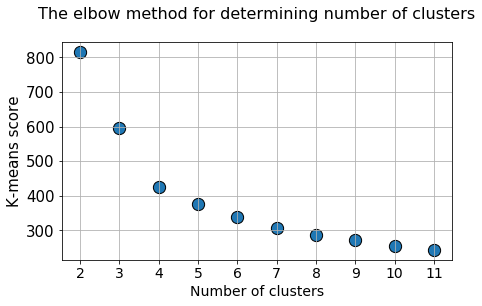

In [74]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

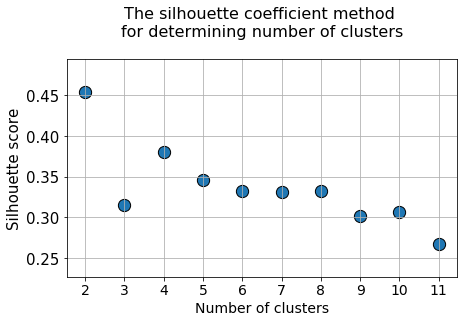

In [76]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

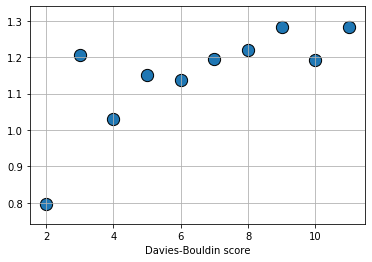

In [77]:

plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()

In [78]:
from sklearn.mixture import GaussianMixture

In [25]:
gm_bic= []
gm_score=[]
for i in range(2,12):
    gm = GMM(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_train_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_train_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_train_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_train_scaled))
    gm_score.append(gm.score(X_train_scaled))

BIC for number of cluster(s) 2: -177505.57943638397
Log-likelihood score for number of cluster(s) 2: 48.87912296078367
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -207800.61128318627
Log-likelihood score for number of cluster(s) 3: 57.50320907814423
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -208075.66093255524
Log-likelihood score for number of cluster(s) 4: 58.00500563992219
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -222755.25788145026
Log-likelihood score for number of cluster(s) 5: 62.40413642776238
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -223264.34396173098
Log-likelihood score for number of cluster(s) 6: 62.96925453470044
-

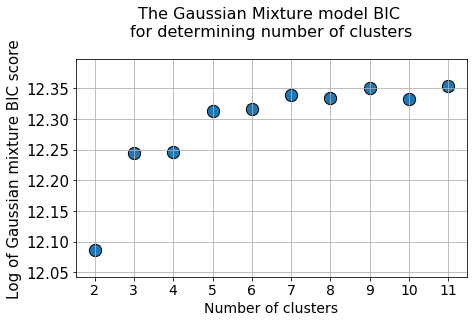

In [26]:

plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

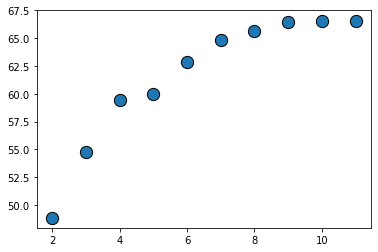

In [81]:
plt.scatter(x=[i for i in range(2,12)],y=gm_score,s=150,edgecolor='k')
plt.show()